In [139]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.stats import chi2_contingency
import seaborn as sns

In [140]:
file= Path("sources/Amazon Customer Behavior Survey.csv")
file_df= pd.read_csv(file)
file_df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [141]:
Weekly_trends = file_df.loc[:, ['Timestamp', 'Gender']]

Weekly_trends.head(10)

,Timestamp,Gender
0,2023/06/04 1:28:19 PM GMT+5:30,Female
1,2023/06/04 2:30:44 PM GMT+5:30,Female
2,2023/06/04 5:04:56 PM GMT+5:30,Prefer not to say
3,2023/06/04 5:13:00 PM GMT+5:30,Female
4,2023/06/04 5:28:06 PM GMT+5:30,Female
5,2023/06/04 6:01:59 PM GMT+5:30,Female
6,2023/06/04 6:31:41 PM GMT+5:30,Female
7,2023/06/04 7:13:12 PM GMT+5:30,Female
8,2023/06/04 7:23:21 PM GMT+5:30,Female
9,2023/06/04 7:33:12 PM GMT+5:30,Female


In [142]:
unique_timestamp = file_df['Timestamp'].unique()
print("Unique values in Timestamp column:")
print(unique_timestamp)

Unique values in Timestamp column:
['2023/06/04 1:28:19 PM GMT+5:30' '2023/06/04 2:30:44 PM GMT+5:30'
 '2023/06/04 5:04:56 PM GMT+5:30' '2023/06/04 5:13:00 PM GMT+5:30'
 '2023/06/04 5:28:06 PM GMT+5:30' '2023/06/04 6:01:59 PM GMT+5:30'
 '2023/06/04 6:31:41 PM GMT+5:30' '2023/06/04 7:13:12 PM GMT+5:30'
 '2023/06/04 7:23:21 PM GMT+5:30' '2023/06/04 7:33:12 PM GMT+5:30'
 '2023/06/04 7:45:33 PM GMT+5:30' '2023/06/04 7:48:31 PM GMT+5:30'
 '2023/06/04 8:00:11 PM GMT+5:30' '2023/06/04 8:01:45 PM GMT+5:30'
 '2023/06/04 8:02:28 PM GMT+5:30' '2023/06/04 8:20:42 PM GMT+5:30'
 '2023/06/04 8:39:53 PM GMT+5:30' '2023/06/04 8:45:45 PM GMT+5:30'
 '2023/06/04 8:46:02 PM GMT+5:30' '2023/06/04 8:48:59 PM GMT+5:30'
 '2023/06/04 8:49:49 PM GMT+5:30' '2023/06/04 8:52:49 PM GMT+5:30'
 '2023/06/04 8:54:36 PM GMT+5:30' '2023/06/04 9:10:08 PM GMT+5:30'
 '2023/06/04 9:10:51 PM GMT+5:30' '2023/06/04 9:18:12 PM GMT+5:30'
 '2023/06/04 9:22:58 PM GMT+5:30' '2023/06/04 9:29:59 PM GMT+5:30'
 '2023/06/04 9:40:54 PM GMT

In [143]:
file_df['Timestamp'] = pd.to_datetime(file_df['Timestamp'])

# Extract date, time, and timezone

file_df['Date'] = file_df['Timestamp'].dt.strftime('%Y-%m-%d')
file_df['Time'] = file_df['Timestamp'].dt.strftime('%H:%M:%S')
file_df['Timezone'] = 'GMT +05:30'
file_df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Date,Time,Timezone
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,2023-06-04,13:28:19,GMT +05:30
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2023-06-04,14:30:44,GMT +05:30
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,No,4,No,3,3,Competitive prices,Product quality and accuracy,2023-06-04,17:04:56,GMT +05:30
3,2023-06-04 17:13:00-05:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,2023-06-04,17:13:00,GMT +05:30
4,2023-06-04 17:28:06-05:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,2023-06-04,17:28:06,GMT +05:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023-06-12 16:02:02-05:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness,2023-06-12,16:02:02,GMT +05:30
598,2023-06-12 16:02:53-05:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste,2023-06-12,16:02:53,GMT +05:30
599,2023-06-12 16:03:59-05:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy,2023-06-12,16:03:59,GMT +05:30
600,2023-06-12 21:57:20-05:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy,2023-06-12,21:57:20,GMT +05:30


In [144]:
file_df['Date'] = pd.to_datetime(file_df['Date'])
# Extract the day name and create a new column
file_df['Day_Name'] = file_df['Date'].dt.day_name()
# Display the DataFrame with the new 'Day_Name' column
file_df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Date,Time,Timezone,Day_Name
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,2,Yes,1,1,Competitive prices,Reducing packaging waste,2023-06-04,13:28:19,GMT +05:30,Sunday
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2023-06-04,14:30:44,GMT +05:30,Sunday
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,4,No,3,3,Competitive prices,Product quality and accuracy,2023-06-04,17:04:56,GMT +05:30,Sunday
3,2023-06-04 17:13:00-05:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,2023-06-04,17:13:00,GMT +05:30,Sunday
4,2023-06-04 17:28:06-05:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,4,Yes,2,2,Competitive prices,Product quality and accuracy,2023-06-04,17:28:06,GMT +05:30,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023-06-12 16:02:02-05:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,3,Sometimes,3,4,Competitive prices,Customer service responsiveness,2023-06-12,16:02:02,GMT +05:30,Monday
598,2023-06-12 16:02:53-05:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,3,Sometimes,3,3,Product recommendations,Reducing packaging waste,2023-06-12,16:02:53,GMT +05:30,Monday
599,2023-06-12 16:03:59-05:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,3,Sometimes,2,3,Wide product selection,Product quality and accuracy,2023-06-12,16:03:59,GMT +05:30,Monday
600,2023-06-12 21:57:20-05:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,2,Yes,2,2,Wide product selection,Product quality and accuracy,2023-06-12,21:57:20,GMT +05:30,Monday


In [ ]:
#For my analysis I looked at the major question around time and day 
#in where the most puchases were being made, analyzing the data this
#way helps the marketing team and us see when ads should be placed and 
#where ad spent would be the most effective.

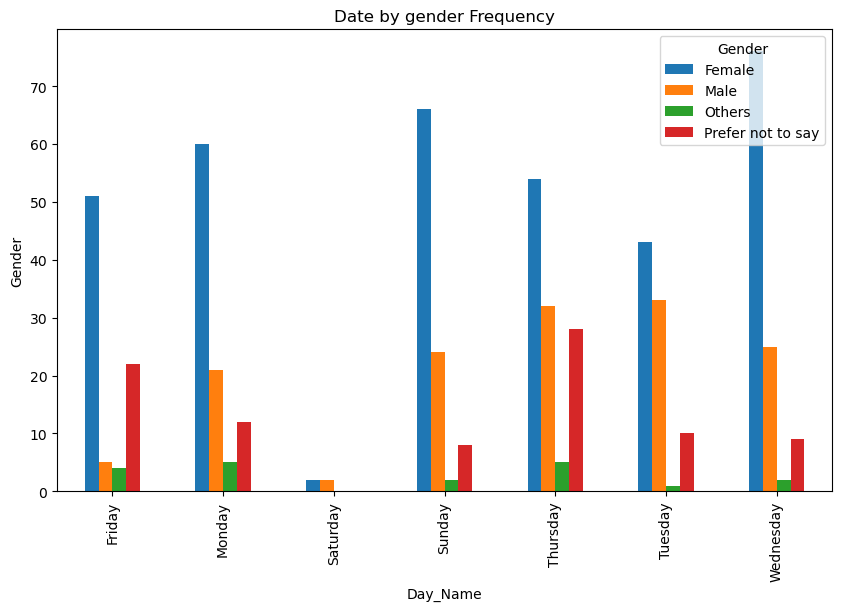

In [145]:
grouped = file_df.groupby(['Day_Name', 'Gender']).size().unstack()
grouped.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Date by gender Frequency')
plt.xlabel('Day_Name')
plt.ylabel('Gender')
plt.show()

In [ ]:
#We also want to compare this data with Gender.
#To clean up this data we took time stamps and seperated time/ day
#as well as categorized the day of week to make it visibly pleasing to understand.

In [146]:
#Analysis for bargraph: 
#We can see for males Thursday, Tuesday, and wednesday (weekdays) are the most popular for their purchases.
#In the other hand, females made the most puchases on Sunday and Wednesday, specially on wednesday. 
#For this case I would love to explore more data that can be up deals on the weekdays and viewing this data made me want to explore time stamps that these purchases are being made.
#Sunday we saw the least amount of sales over all with an equal amount of purchases for Male and Female.

In [147]:
file_df['Time'] = pd.to_datetime(file_df['Time'])
def group_time(time):
  if time.hour < 12:
    return 'Morning'
  elif time.hour < 18:
    return 'Afternoon'
  else:
    return 'Evening'
file_df['time_category'] = file_df['Time'].apply(group_time)
file_df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Date,Time,Timezone,Day_Name,time_category
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Yes,1,1,Competitive prices,Reducing packaging waste,2023-06-04,2023-11-02 13:28:19,GMT +05:30,Sunday,Afternoon
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,3,2,Wide product selection,Reducing packaging waste,2023-06-04,2023-11-02 14:30:44,GMT +05:30,Sunday,Afternoon
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,No,3,3,Competitive prices,Product quality and accuracy,2023-06-04,2023-11-02 17:04:56,GMT +05:30,Sunday,Afternoon
3,2023-06-04 17:13:00-05:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,3,4,Competitive prices,Product quality and accuracy,2023-06-04,2023-11-02 17:13:00,GMT +05:30,Sunday,Afternoon
4,2023-06-04 17:28:06-05:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Yes,2,2,Competitive prices,Product quality and accuracy,2023-06-04,2023-11-02 17:28:06,GMT +05:30,Sunday,Afternoon


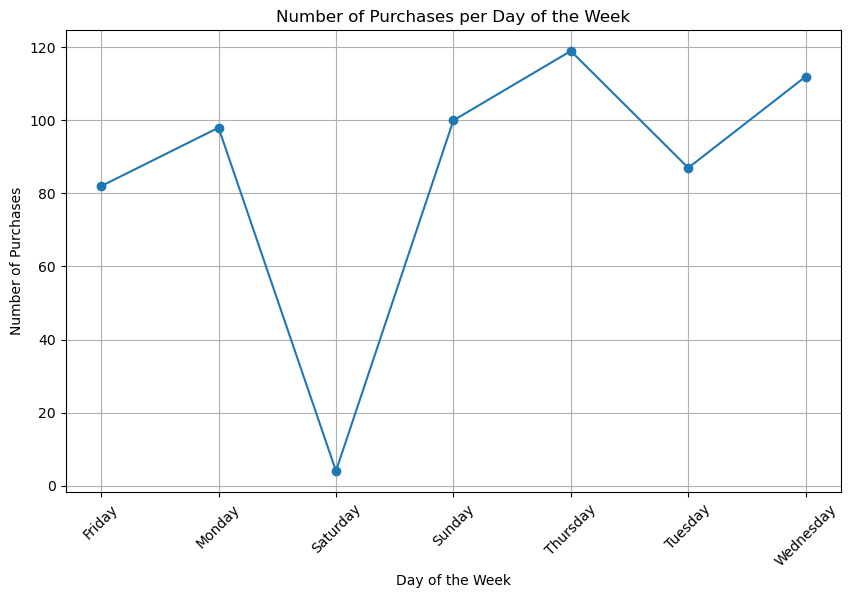

In [152]:
file_df['Timestamp'] = pd.to_datetime(file_df['Timestamp'])
# Grouping the data by the day of the week and counting the number of purchases on each day
purchase_count_per_day = file_df.groupby(file_df['Timestamp'].dt.day_name()).size()
# Plotting the purchase count per day of the week
plt.figure(figsize=(10, 6))
purchase_count_per_day.plot(kind='line', marker='o')
plt.title('Number of Purchases per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
#This chart is an extension analysis of the first graph that shows us just purchases not devided into genders to give an outlook on what day the puchases where mostly made.
#To no surprise we can see without bias we can see that thursday and wednesday are the most popular days to make purshases for Amazon.

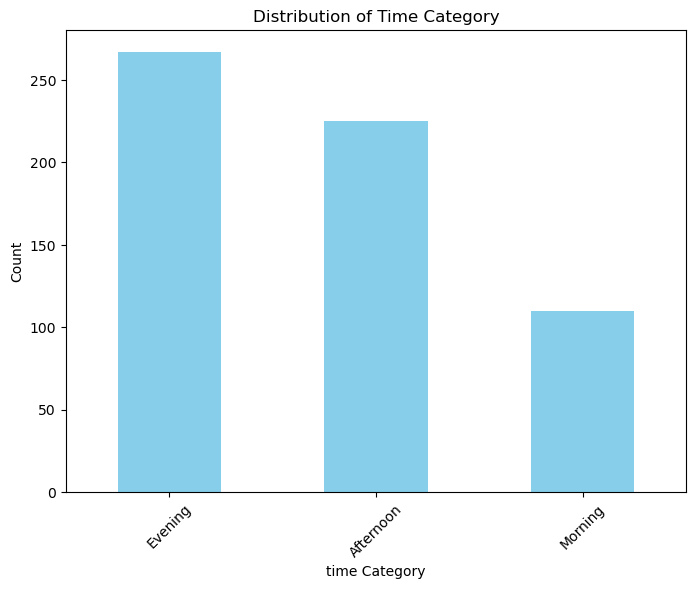

In [157]:
time_categories_count = file_df['time_category'].value_counts()
plt.figure(figsize=(8, 6))
time_categories_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Time Category')
plt.xlabel('time Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#To better analyze behavior and insights we separate the time of the purchase by time categories. 
#The most amount of purchases were completed in the evening.
#This can be comcluded no having the data that most puchases are done on the days on the week assumingpeople make the most purchases getting out of work.

<Figure size 1200x800 with 0 Axes>

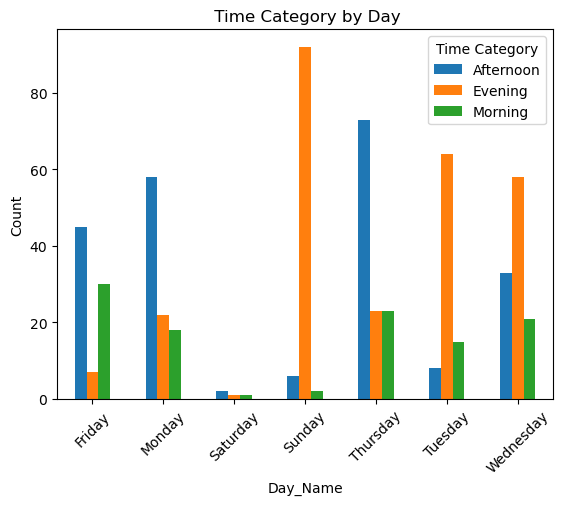

In [161]:
grouped_data = file_df.groupby(['Day_Name', 'time_category']).size().unstack()
# Plotting the grouped bar plot
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title(' Time Category by Day')
plt.xlabel('Day_Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Time Category')
plt.show()

<Figure size 1200x800 with 0 Axes>

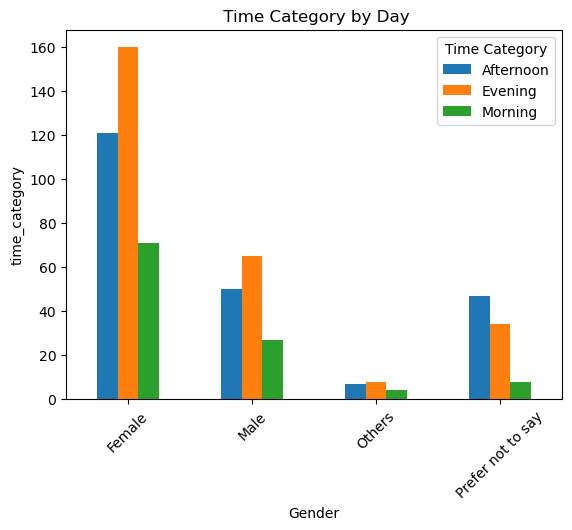

In [162]:
grouped_data = file_df.groupby(['Gender', 'time_category']).size().unstack()
# Plotting the grouped bar plot
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar')
plt.title(' Time Category by Day')
plt.xlabel('Gender')
plt.ylabel('time_category')
plt.xticks(rotation=45)
plt.legend(title='Time Category')
plt.show()

In [ ]:
grouped = file_df.groupby(['Day_Name', 'time_category']).size().unstack()
grouped.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Date by gender Frequency')
plt.xlabel('Day_Name')
plt.ylabel('Gender')
plt.show()